In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf


#Reading historical data for 42 large-cap tech stocks
tickers = ['AAPL', 'ACN', 'ADI', 'ADP', 'ADS', 'ADSK', 'ANSS', 'APH', 'BABA', 'BIDU', 'BR', 'CRM', 'CTXS', 'FB', 
'FFIV', 'FIS', 'FISV','GOOG', 'GPN', 'IBM','INTC', 'INTU', 'IPGP', 'IT', 'JKHY', 'KEYS', 'KLAC', 'LRCX', 'MA', 'MCHP', 'MSFT',
'MSI', 'NVDA', 'NXPI', 'PYPL', 'SNPS', 'TEL', 'TTWO', 'TXN', 'V', 'VRSN', 'XLNX']
data = yf.download(tickers,'2015-1-1', '2021-7-1')['Adj Close']

[*********************100%***********************]  42 of 42 completed


In [ ]:
data.head()

,AAPL,ACN,ADI,ADP,ADS,ADSK,ANSS,APH,BABA,BIDU,...,NVDA,NXPI,PYPL,SNPS,TEL,TTWO,TXN,V,VRSN,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,25.057606,79.451836,47.975574,72.090866,268.380554,60.060001,82.000000,25.280970,103.940002,227.970001,...,19.286711,73.656746,NaN,43.470001,55.506519,28.030001,45.065018,62.740623,57.000000,38.177887
2015-01-02,24.819241,79.033722,47.992855,72.021698,267.742523,59.529999,81.639999,25.201101,103.599998,223.080002,...,19.363665,74.052017,NaN,43.099998,55.436302,28.100000,45.073448,63.415421,57.189999,38.451271
2015-01-05,24.120045,77.699280,47.120094,71.969826,264.017700,58.660000,80.860001,24.740683,101.000000,219.789993,...,19.036613,73.271095,NaN,42.540001,54.356899,27.620001,44.373913,62.015598,56.240002,37.745739
2015-01-06,24.122320,77.138832,46.014027,71.373161,260.658875,57.500000,79.260002,24.425903,103.320000,220.179993,...,18.459450,69.781082,NaN,42.160000,53.698711,27.930000,43.640671,61.615978,55.180000,37.198963
2015-01-07,24.460564,78.757927,46.497940,71.995735,262.657318,57.380001,79.709999,24.844038,102.129997,224.350006,...,18.411348,71.661079,NaN,42.209999,55.313438,28.100000,44.424477,62.441525,55.639999,37.216599


In [ ]:
#Calculating daily returns 
daily_stock_returns = (data-data.shift(1))/data.shift(1)
daily_stock_returns.dropna(inplace=True)

#Assigning ranks in order of decreasing daily returns
df_rank = daily_stock_returns.rank(axis=1, ascending=False, method='min')

In [ ]:
daily_stock_returns.head(3)

,AAPL,ACN,ADI,ADP,ADS,ADSK,ANSS,APH,BABA,BIDU,...,NVDA,NXPI,PYPL,SNPS,TEL,TTWO,TXN,V,VRSN,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-07,-0.002460,0.013766,-0.003302,0.002969,0.010342,0.045927,0.007043,-0.002321,-0.007603,-0.007882,...,-0.018840,-0.002482,-0.002452,0.001007,-0.004395,0.005463,-0.003503,-0.005138,0.005097,0.004144
2015-07-08,-0.024823,-0.010742,-0.022720,-0.012828,-0.017628,-0.015200,-0.008633,-0.030238,-0.021100,-0.015783,...,-0.007074,-0.043848,-0.052430,-0.000603,-0.026328,-0.013039,-0.032806,-0.015346,-0.025357,-0.022008
2015-07-09,-0.020397,0.001332,-0.016952,0.008247,0.005959,-0.000381,0.007496,0.001661,0.014113,0.016199,...,-0.012214,-0.018755,-0.005764,0.012679,-0.000486,0.017982,-0.028669,0.004795,0.011545,-0.018987


In [ ]:
df_rank.head(3)

,AAPL,ACN,ADI,ADP,ADS,ADSK,ANSS,APH,BABA,BIDU,...,NVDA,NXPI,PYPL,SNPS,TEL,TTWO,TXN,V,VRSN,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-07,28.0,5.0,30.0,17.0,6.0,1.0,9.0,26.0,39.0,40.0,...,42.0,29.0,27.0,21.0,34.0,12.0,32.0,38.0,13.0,15.0
2015-07-08,33.0,11.0,31.0,15.0,24.0,20.0,9.0,38.0,28.0,23.0,...,7.0,41.0,42.0,2.0,35.0,16.0,39.0,21.0,34.0,30.0
2015-07-09,40.0,26.0,36.0,11.0,17.0,28.0,13.0,24.0,6.0,3.0,...,35.0,37.0,33.0,7.0,29.0,2.0,42.0,19.0,10.0,38.0


In [ ]:
# Generating trade signal on the basis of ranks
df_signal = df_rank.copy()
for ticker in tickers:
    df_signal[ticker] = np.where(df_signal[ticker] < 22, -1, 1)

# Calculating returns on the basis of our trade signals
returns = df_signal.mul(daily_stock_returns.shift(-1), axis=0)

# Summing returns over all stocks to get final returns 
strategy_returns = np.sum(returns, axis=1)/len(tickers)

In [ ]:
df_signal.head(3)

,AAPL,ACN,ADI,ADP,ADS,ADSK,ANSS,APH,BABA,BIDU,...,NVDA,NXPI,PYPL,SNPS,TEL,TTWO,TXN,V,VRSN,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-07,1,-1,1,-1,-1,-1,-1,1,1,1,...,1,1,1,-1,1,-1,1,1,-1,-1
2015-07-08,1,-1,1,-1,1,-1,-1,1,1,1,...,-1,1,1,-1,1,-1,1,-1,1,1
2015-07-09,1,1,1,-1,-1,1,-1,1,-1,-1,...,1,1,1,-1,1,-1,1,-1,-1,1


In [ ]:
returns.head(3)

,AAPL,ACN,ADI,ADP,ADS,ADSK,ANSS,APH,BABA,BIDU,...,NVDA,NXPI,PYPL,SNPS,TEL,TTWO,TXN,V,VRSN,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-07,-0.024823,0.010742,-0.022720,0.012828,0.017628,0.015200,0.008633,-0.030238,-0.021100,-0.015783,...,-0.007074,-0.043848,-0.052430,0.000603,-0.026328,0.013039,-0.032806,-0.015346,0.025357,0.022008
2015-07-08,-0.020397,-0.001332,-0.016952,-0.008247,0.005959,0.000381,-0.007496,0.001661,0.014113,0.016199,...,0.012214,-0.018755,-0.005764,-0.012679,-0.000486,-0.017982,-0.028669,-0.004795,0.011545,-0.018987
2015-07-09,0.026734,0.010537,0.010182,-0.010286,-0.021967,0.000953,-0.011269,0.004052,-0.015941,-0.000960,...,0.017517,0.024528,0.005507,-0.001192,0.011016,-0.018746,0.018707,-0.020432,-0.015753,0.002150


Start date,2015-07-07
End date,2021-06-30
Total months,71
,Backtest
Annual return,6.9%
Cumulative returns,49.1%
Annual volatility,5.2%
Sharpe ratio,1.32
Calmar ratio,1.44
Stability,0.91
Max drawdown,-4.8%


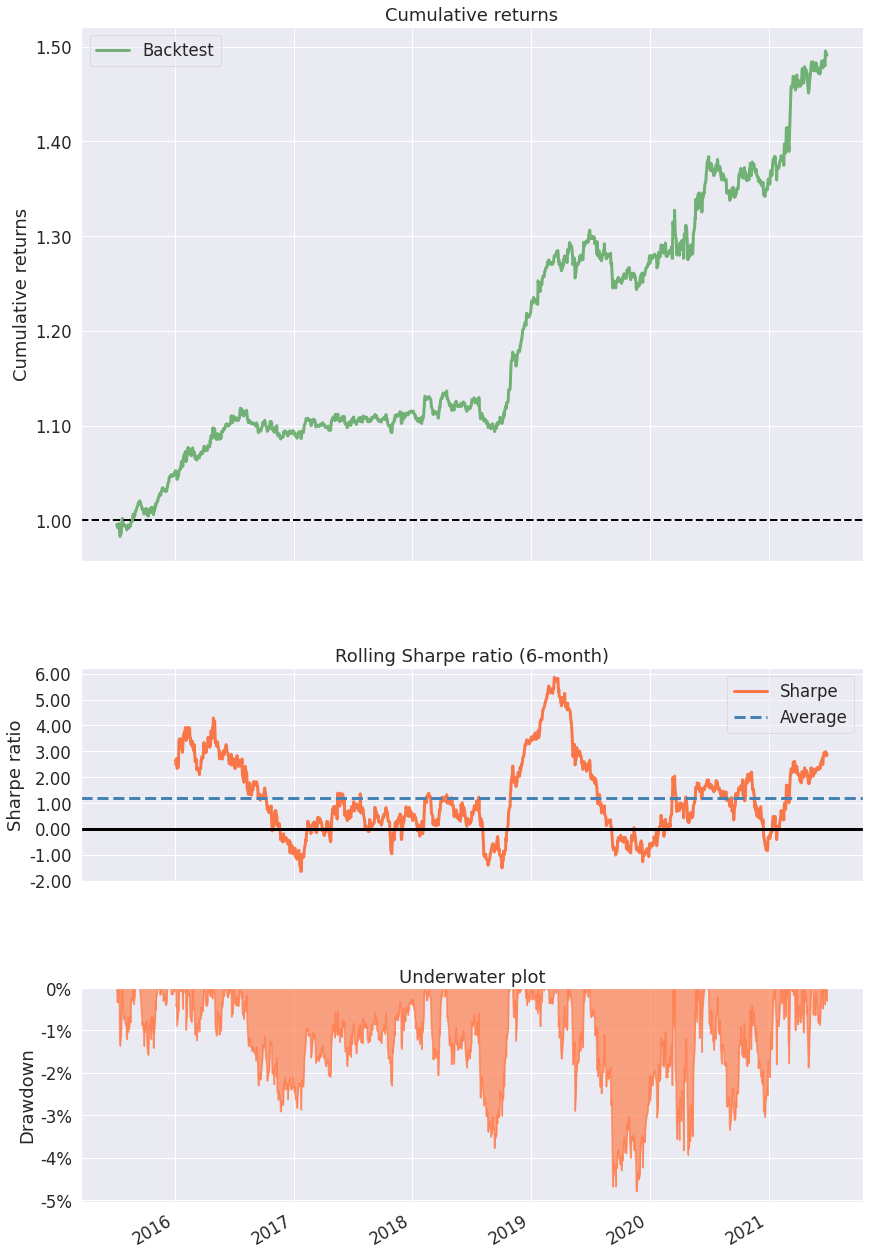

In [ ]:

#pyfolio is a great library to analyse strategy performance
import pyfolio as pf
pf.create_simple_tear_sheet(strategy_returns)



In [ ]:
strategy_returns

Date
2015-07-07   -0.004306
2015-07-08   -0.002249
2015-07-09   -0.001153
2015-07-10    0.001726
2015-07-13    0.002031
                ...   
2020-11-23   -0.002235
2020-11-24    0.002779
2020-11-25   -0.002381
2020-11-27   -0.002865
2020-11-30    0.000000
Length: 1362, dtype: float64